In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [20]:
df = pd.read_csv('datasets/father_son_heights.csv', sep="\t")
df

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


In [21]:
df['Father'].shape

(1078,)

In [22]:
# reshape -1, 1 significa che prendiamo i valori della column di pandas (array monodimensionale di dimensione N) 
# e lo trasformiamo in un vettore colonna di dimensioni (N, 1) 
# (-1 serve a ricavare la dimensione originale della column di pandas)

x = df['Father'].values.reshape(-1,1)
y = df['Son']# .values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

print(y_train.shape)

(754,)


In [23]:
sgd_reg = SGDRegressor( 
    max_iter=400000, 
    learning_rate='adaptive', 
    n_iter_no_change=50000
)
sgd_reg.fit(x_train,y_train)

/Users/uffa/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='adaptive', max_iter=400000, n_iter_no_change=50000)

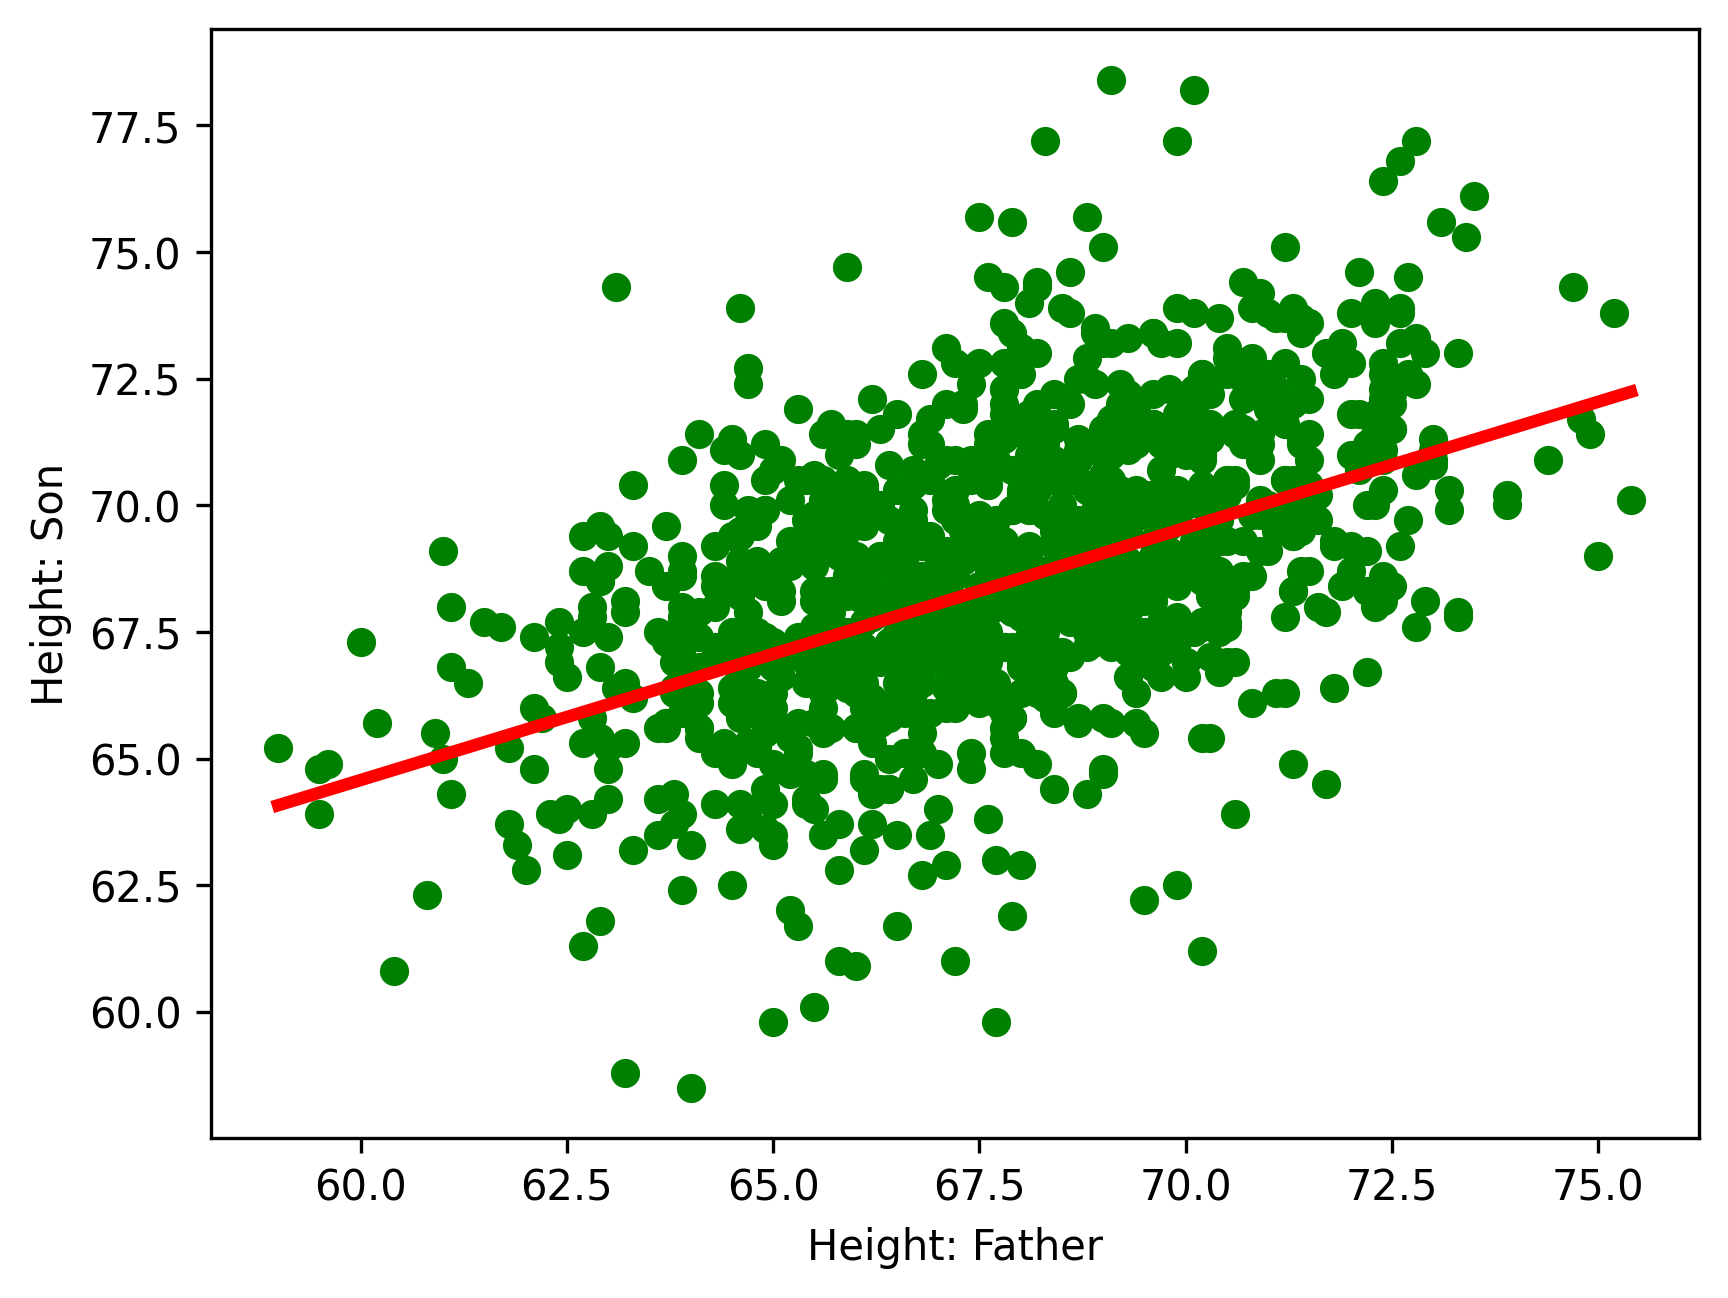

In [13]:
plt.scatter(x, y, color='g')
plt.xlabel('Height: Father')
plt.ylabel('Height: Son')

x_ht_samples = np.linspace(x.min(), x.max(), num=50)
y_ht_prediction = sgd_reg.predict(x_ht_samples.reshape(-1,1))
plt.plot(x_ht_samples, y_ht_prediction, color='r', linewidth=3)
plt.show()

In [14]:
y_pred = sgd_reg.predict(x_test)

print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False)) 

MSE:  6.151621699941758
RMSE:  2.480246298241721


/Users/uffa/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
reg = LinearRegression().fit(x_train, y_train)

y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  6.25966575228162
RMSE:  2.5019324036195743


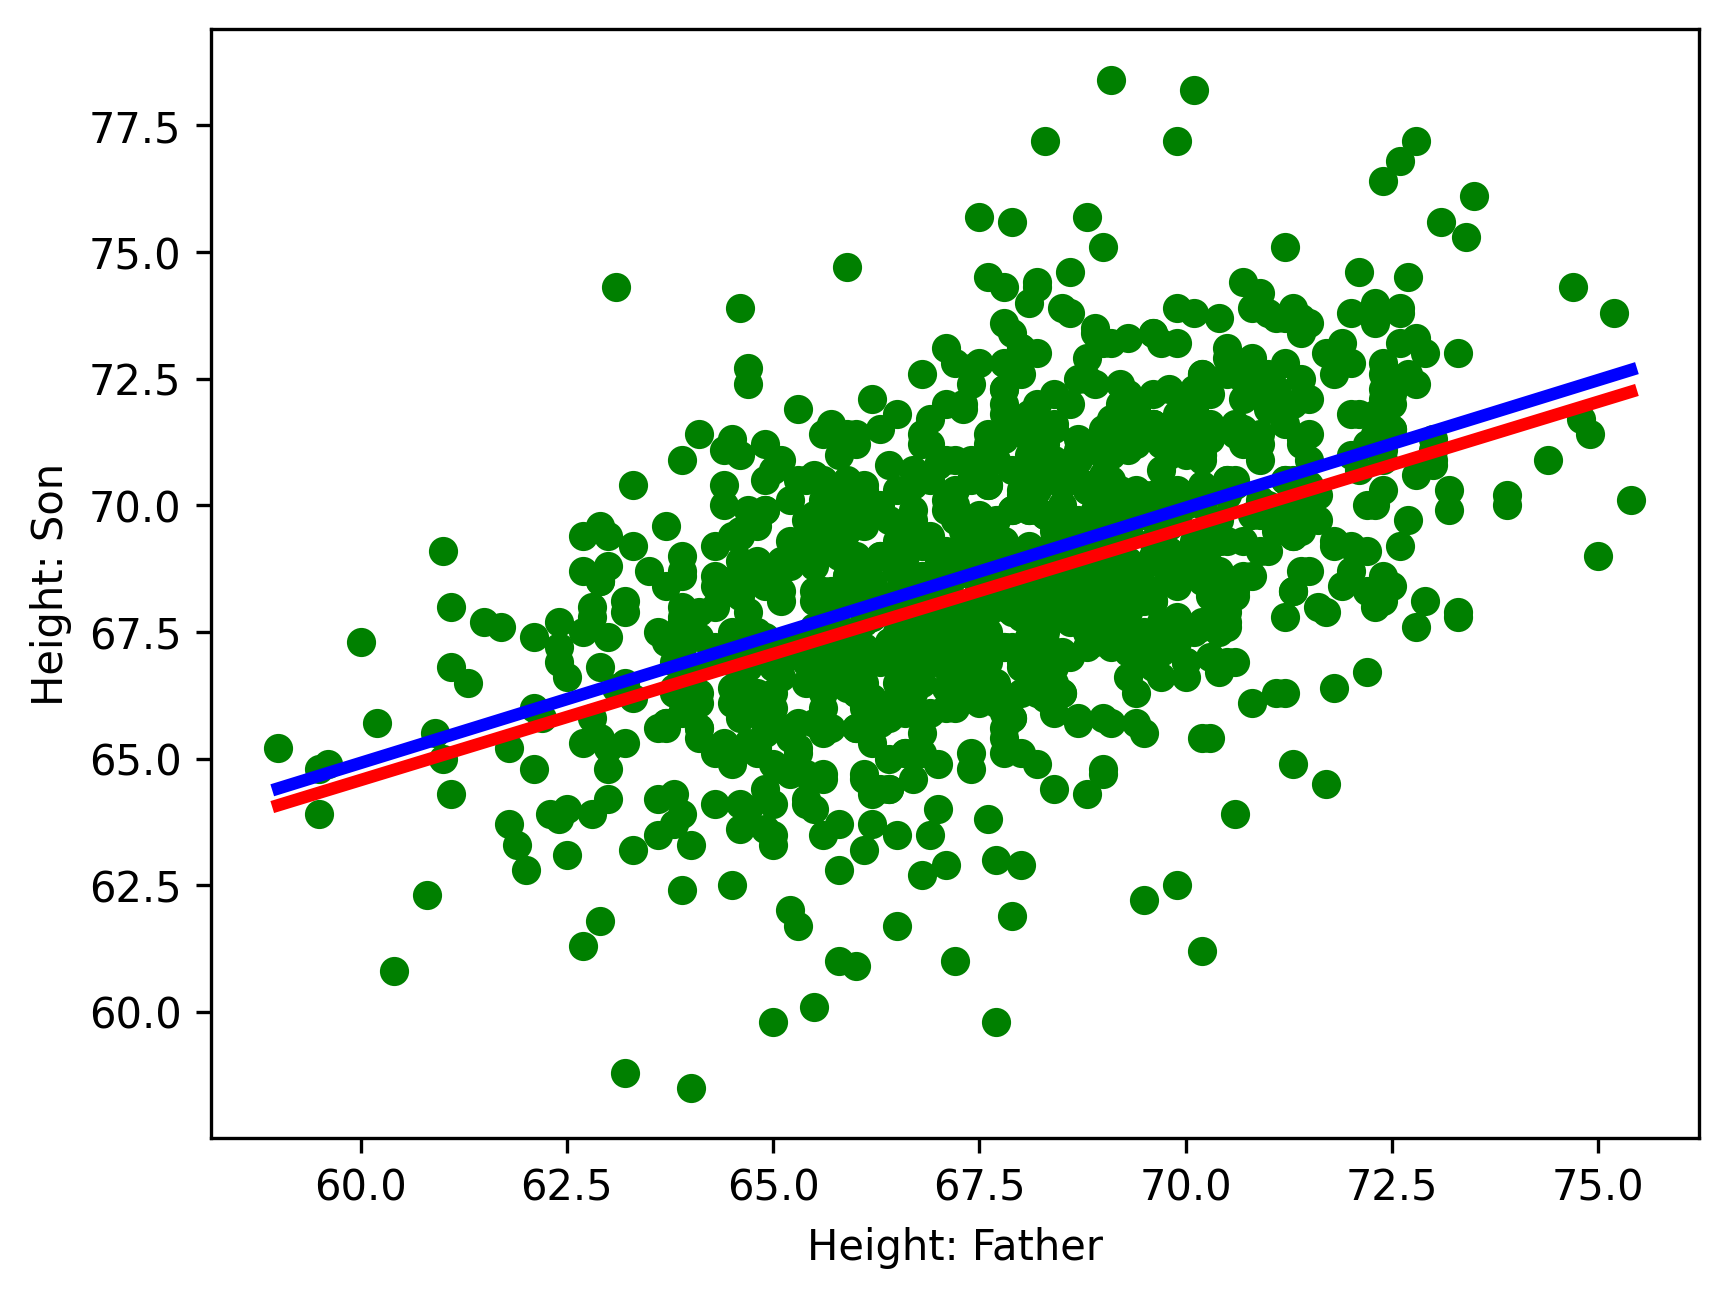

In [17]:
plt.scatter(x, y, color='g') # Scatter-plot of X & Y as in Step 3
plt.xlabel('Height: Father')
plt.ylabel('Height: Son')

x_ht_samples = np.linspace(x.min(), x.max(), num=50)
sgd_prediction = sgd_reg.predict(x_ht_samples.reshape(-1,1))
reg_prediction = reg.predict(x_ht_samples.reshape(-1,1))
plt.plot(x_ht_samples, sgd_prediction, color='r', linewidth=3)
plt.plot(x_ht_samples, reg_prediction, color='b', linewidth=3)
plt.show()

In [10]:
print(f"SGD coef_: {sgd_reg.coef_} LR coef_: {reg.coef_}")
print(f"SGD coef_: {sgd_reg.intercept_} LR coef_: {reg.intercept_}")

SGD coef_: [0.48823114] LR coef_: [0.50373739]
SGD coef_: [34.63068143] LR coef_: 34.68903257197478
